In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating a FinalData file by merging necessary DataFrames

In [153]:
mdata=pd.read_csv("./ratings.csv")

In [154]:
movie=pd.read_csv("./movies.csv")

In [155]:
movie['year'] = movie['title'].str.extract(r'([0-9]{4})', expand=True)

In [156]:
movie.shape

(27278, 4)

In [157]:
avg_rating=mdata[['movieId','rating']].groupby('movieId',as_index=False).mean()


In [158]:
movie=movie.merge(avg_rating)
movie.head()


,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [159]:
movie['timestamp']=pd.to_datetime(mdata.timestamp,unit='s')

In [160]:
movie.head()

,movieId,title,genres,year,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240,2005-04-02 23:53:47
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977,2005-04-02 23:31:16
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040,2005-04-02 23:33:39
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393,2005-04-02 23:32:07
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592,2005-04-02 23:29:40


In [161]:
movie.isnull().any()

movieId      False
title        False
genres       False
year          True
rating       False
timestamp    False
dtype: bool

In [162]:
del movie['year']

In [163]:
movie.to_csv('FinalData.csv',encoding='utf-8')

In [164]:
finaldata=pd.read_csv('./FinalData.csv')
finaldata.head(10)

,Unnamed: 0,movieId,title,genres,rating,timestamp
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,2005-04-02 23:53:47
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,2005-04-02 23:31:16
2,2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,2005-04-02 23:33:39
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2005-04-02 23:32:07
4,4,5,Father of the Bride Part II (1995),Comedy,3.064592,2005-04-02 23:29:40
5,5,6,Heat (1995),Action|Crime|Thriller,3.834930,2004-09-10 03:09:00
6,6,7,Sabrina (1995),Comedy|Romance,3.366484,2004-09-10 03:08:54
7,7,8,Tom and Huck (1995),Adventure|Children,3.142049,2005-04-02 23:46:13
8,8,9,Sudden Death (1995),Action,3.004924,2005-04-02 23:35:40
9,9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029,2005-04-02 23:33:46


In [165]:
del finaldata['Unnamed: 0']
finaldata.head()

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,2005-04-02 23:53:47
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,2005-04-02 23:31:16
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,2005-04-02 23:33:39
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,2005-04-02 23:32:07
4,5,Father of the Bride Part II (1995),Comedy,3.064592,2005-04-02 23:29:40


### Top Genres/Genres combos according to number of movies made and rating from 1960 to 2016  : 'genrat'

In [166]:
genrat=finaldata[['genres','rating']]

In [167]:
genrat['gencount']=genrat.groupby('genres',as_index=False)['genres'].transform(lambda s:s.count())
genrat.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,genres,rating,gencount
0,Adventure|Animation|Children|Comedy|Fantasy,3.921240,18
1,Adventure|Children|Fantasy,3.211977,33
2,Comedy|Romance,3.151040,741
3,Comedy|Drama|Romance,2.861393,594
4,Comedy,3.064592,2251


In [168]:
morenum=genrat['gencount']>1
genrat=genrat[morenum]

In [169]:
genrat.sort_values(by='gencount',inplace=True,ascending=False)

In [170]:
genrat.head()

,genres,rating,gencount
25518,Drama,3.000000,4416
20810,Drama,2.250000,4416
16840,Drama,3.666667,4416
20793,Drama,4.000000,4416
20794,Drama,3.277778,4416


In [171]:
genrat=genrat.groupby('genres').mean()

In [172]:
genrat.head()

,rating,gencount
genres,,
(no genres listed),2.803788,242
Action,2.623350,176
Action|Adventure,2.949195,85
Action|Adventure|Animation,3.232904,18
Action|Adventure|Animation|Children,2.565885,8


In [173]:
genrat.sort_values(by=['gencount','rating'],inplace=True,ascending=False)

In [174]:
genrat=genrat.reset_index()

In [175]:
genrat.head(20)

,genres,rating,gencount
0,Drama,3.298640,4416
1,Comedy,2.975247,2251
2,Documentary,3.454064,1879
3,Comedy|Drama,3.256077,1241
4,Drama|Romance,3.291905,1043
5,Comedy|Romance,3.073011,741
6,Comedy|Drama|Romance,3.290667,594
7,Horror,2.551257,556
8,Crime|Drama,3.265558,435
9,Drama|Thriller,3.122286,421


### By the above findings, Most popular movie genres(by number of movie release till date and then avg. rating) combo are:
#### 1) Comedy | Drama
#### 2) Drama | Romance
#### 3) Comedy | Romance

 # Sci-Fi vs Comedy 

In [176]:
sci=finaldata[finaldata.genres.str.contains('Sci-Fi')]

In [177]:
sci.rating.describe()

count    1720.000000
mean        2.890215
std         0.720301
min         0.500000
25%         2.500000
50%         3.000000
75%         3.403055
max         5.000000
Name: rating, dtype: float64

In [178]:
com=finaldata[finaldata.genres.str.contains('Comedy')]

In [179]:
com.rating.describe()

count    8232.000000
mean        3.074869
std         0.649420
min         0.500000
25%         2.732395
50%         3.144236
75%         3.500000
max         5.000000
Name: rating, dtype: float64

###### Sci-Fi Movie Count per Year plot

In [182]:
sci=sci.sort_values(by='timestamp')

In [183]:
sci['year'] = sci['title'].str.extract('.*\((.*)\).*', expand=True)

In [184]:
sci=sci[['rating','year']]

In [185]:
sciyear=sci.year.value_counts()


In [186]:
#sciyear=sciyear.sort_values()

Text(0,0.5,'Number of Sci-Fi Movies Released')

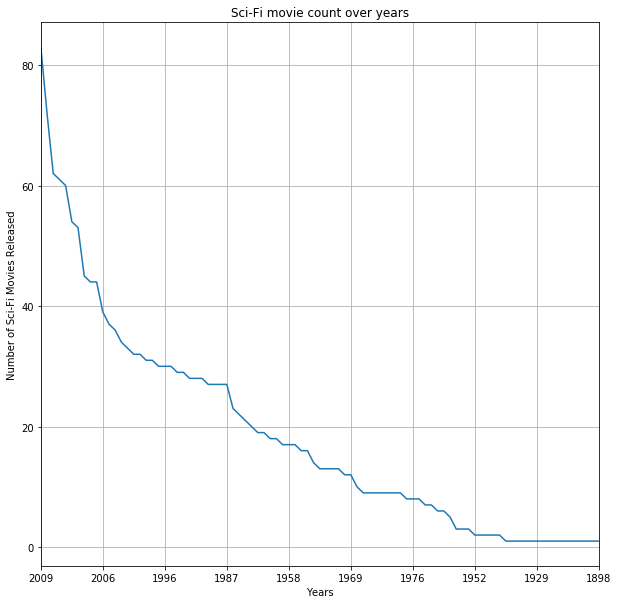

In [187]:
%matplotlib inline

graph=sciyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Sci-Fi movie count over years")
graph.set_xlabel("Years")
graph.set_ylabel("Number of Sci-Fi Movies Released")

###### Comedy Movie Count per Year plot

In [188]:
com['year'] = com['title'].str.extract('.*\((.*)\).*', expand=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
com=com[['rating','year']]

In [190]:
comyear=com.year.value_counts()


In [191]:
#comyear=comyear.sort_values()

Text(0,0.5,'Number of Comedy Movies Released')

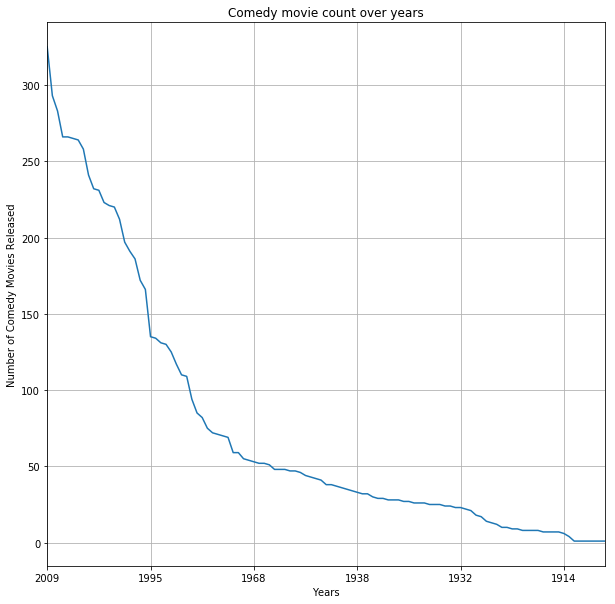

In [192]:
%matplotlib inline

comgraph=comyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Comedy movie count over years")
comgraph.set_xlabel("Years")
comgraph.set_ylabel("Number of Comedy Movies Released")

##### Overall Movie Release per year

Text(0,0.5,'Number of Toal Movies Released')

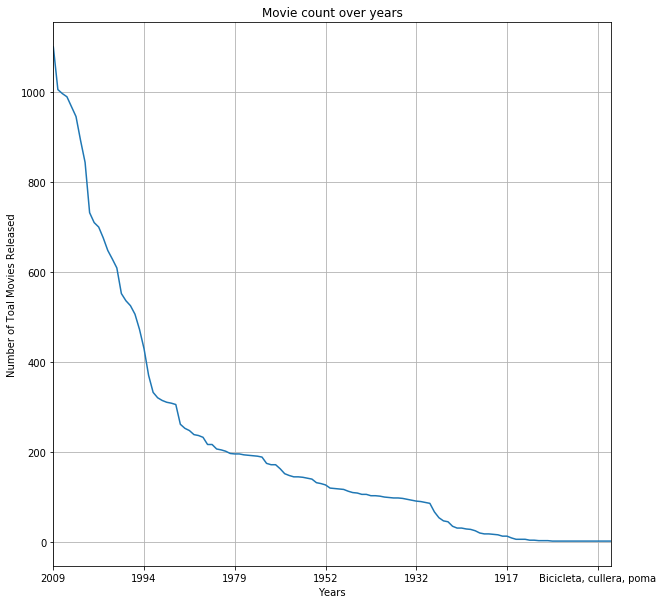

In [193]:
overall=finaldata.sort_values(by='timestamp')

overall['year'] = overall['title'].str.extract('.*\((.*)\).*', expand=True)

overall=overall[['rating','year']]

overyear=overall.year.value_counts()


#overyear=overyear.sort_values()

%matplotlib inline

overgraph=overyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Movie count over years")
overgraph.set_xlabel("Years")
overgraph.set_ylabel("Number of Toal Movies Released")

After exploring these data of sci-fi and comedy movie and examining the curvature of these three line graph, I can safely comment that:
 ### Number of Sci-Fi movie release per year has been incresed but when we campair it with comedy or overall movie release per year, it seems that ratio of Movie releases remains the same.
 In old times, like in 70s0-80s number of movie releases is low and so number of sci-i movie release is also low, as timeline increases the number of Sci-Fi movie release per year increses and so does overall movie release per year increse.
 There is not that sigificant change in ratio of movie release per year according to genres.
 

To be fully satisfied, lets plot some more genres..

###### Drama Movie Count per Year plot

In [194]:
drama=finaldata[finaldata.genres.str.contains('Drama')]

In [195]:
drama=drama.sort_values(by='timestamp')

In [196]:
drama['year'] = drama['title'].str.extract('.*\((.*)\).*', expand=True)

In [197]:
drama=drama[['rating','year']]

In [198]:
dramayear=drama.year.value_counts()


In [199]:
#dramayear=dramayear.sort_values()

Text(0,0.5,'Number of Drama Movies Released')

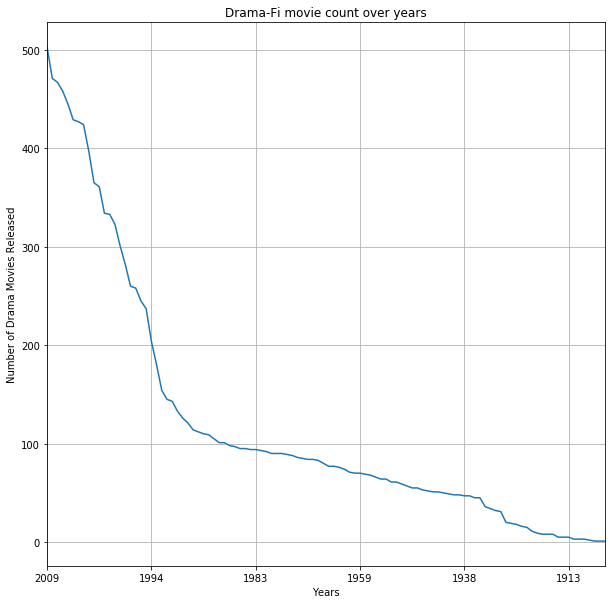

In [200]:
%matplotlib inline

dramagraph=dramayear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Drama-Fi movie count over years")
dramagraph.set_xlabel("Years")
dramagraph.set_ylabel("Number of Drama Movies Released")

###### Action Movie Count per Year plot

In [201]:
action=finaldata[finaldata.genres.str.contains('Action')]

In [204]:
action=action.sort_values(by='timestamp')

In [205]:
action['year'] = action['title'].str.extract('.*\((.*)\).*', expand=True)

In [206]:
action=action[['rating','year']]

In [207]:
actionyear=action.year.value_counts()


In [208]:
#actionyear=actionyear.sort_values()

Text(0,0.5,'Number of Action Movies Released')

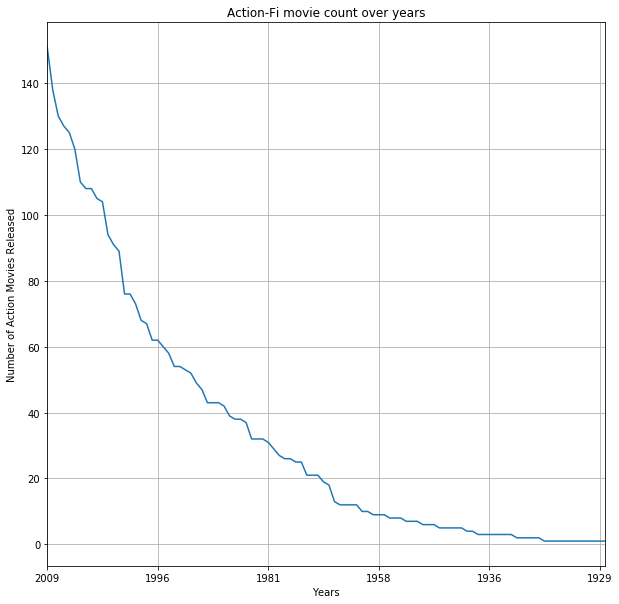

In [209]:
%matplotlib inline

actiongraph=actionyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Action-Fi movie count over years")
actiongraph.set_xlabel("Years")
actiongraph.set_ylabel("Number of Action Movies Released")

###### Thriller Movie Count per Year plot

In [210]:
thriller=finaldata[finaldata.genres.str.contains('Thriller')]

In [213]:
thriller=thriller.sort_values(by='timestamp')

In [214]:
thriller['year'] = thriller['title'].str.extract('.*\((.*)\).*', expand=True)

In [215]:
thriller=thriller[['rating','year']]

In [216]:
thrilleryear=thriller.year.value_counts()


In [217]:
#thrilleryear=thrilleryear.sort_values()

Text(0,0.5,'Number of Thriller Movies Released')

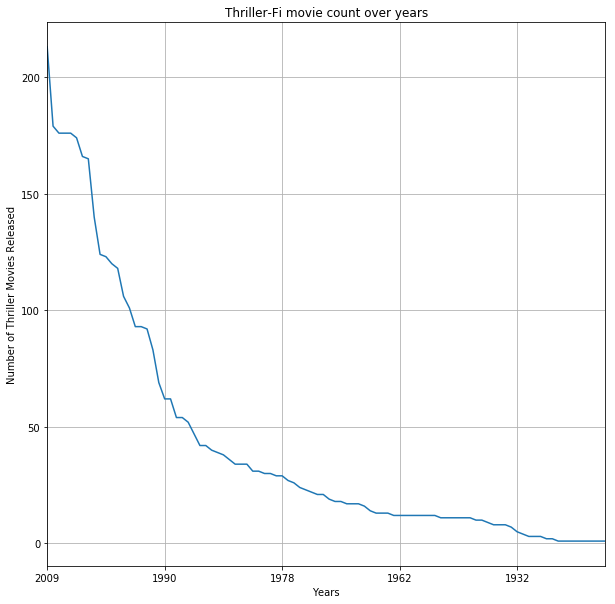

In [218]:
%matplotlib inline

thrillergraph=thrilleryear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Thriller-Fi movie count over years")
thrillergraph.set_xlabel("Years")
thrillergraph.set_ylabel("Number of Thriller Movies Released")

###### Romance Movie Count per Year plot

In [219]:
rom=finaldata[finaldata.genres.str.contains('Romance')]

In [220]:
rom=rom.sort_values(by='timestamp')

In [221]:
rom['year'] = rom['title'].str.extract('.*\((.*)\).*', expand=True)

In [222]:
rom=rom[['rating','year']]

In [223]:
romyear=rom.year.value_counts()


In [224]:
#romyear=romyear.sort_values()

Text(0,0.5,'Number of Romantic Movies Released')

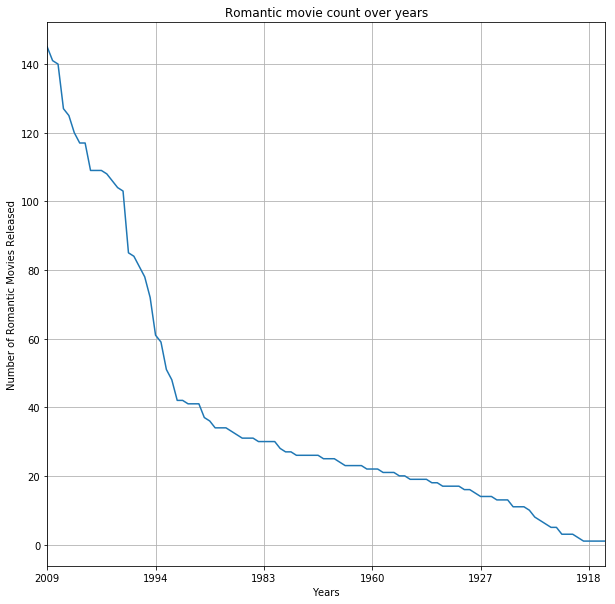

In [225]:
%matplotlib inline

romgraph=romyear.plot(x='year',y='rating',figsize=(10,10),grid=True,title="Romantic movie count over years")
romgraph.set_xlabel("Years")
romgraph.set_ylabel("Number of Romantic Movies Released")

### As we can see, all graphs are almost identical in shape, that conclude that:
## Over years, number of movie releases increased, number of Sci-Fi movie releases also increased but ratio of movies genres released per year remained same approximately.
